In [70]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import data_helper
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Cargando los Datos

In [3]:
data_casas = data_helper.load_data()

### Descripcion de los Datos

**Area_Lote**: Area del lote en metros cuadrados

**Precio**: Precio total de la propiedad en Quetzales

In [4]:
data_casas.head(10)

,Area_Lote,Precio
48,4456,113000
204,3500,110000
225,1680,112000
227,1869,106000
241,3880,110500
363,1680,118000
436,4400,116000
490,2665,115000
500,1890,113000
596,3600,114504


### Graficando los datos

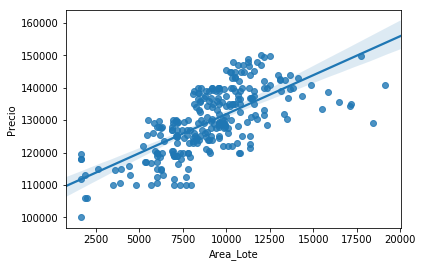

In [5]:
sns.regplot(x=data_casas['Area_Lote'], y=data_casas['Precio'])

# Modelo de Regresion Lineal con Scikit Learn

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_casas, test_size=0.2, random_state=42)

In [78]:
# Crear el objeto de regresion lineal
regr = linear_model.LinearRegression()

train_x = train_set['Area_Lote'].values.reshape(-1, 1)
train_y = train_set['Precio'].values.reshape(-1, 1)

# Entrenamos el modelo
regr.fit(train_x , train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Modelo

In [86]:
m = regr.coef_[0]
b = regr.intercept_
print(' y = {0} * x + {1}'.format(m, b))

 y = [2.41262565] * x + [107748.55024667]


### Graficando las predicciones del modelo  y = 2.41262565 * x + 107748.55024667

####  regr.predict()

In [95]:
# Make predictions using the training set
precio_training_pred = regr.predict(train_x)

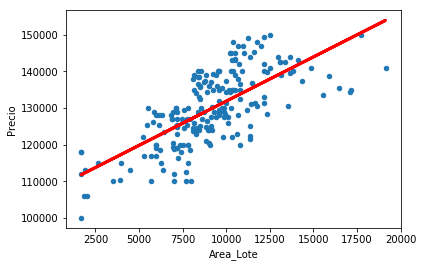

In [96]:
train_set.plot(kind='scatter', x='Area_Lote', y='Precio')
plt.plot( train_x, precio_training_pred, color='red', linewidth=3)
plt.show()

## Prediciendo el precio de una casa 

In [94]:
area = 200

precio = regr.predict(area)[0][0]

print("Para el area ",area," el precio es Q",precio)

Para el area  200  el precio es Q 108231.0753769284
